Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, do not change the filename of this notebook.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercise 5

<font color='red'>Please be sure to provide verbal answers the question prompts along with your code.</font>

## Exercise 5.1: Kinetics of chemical reactions (4 points)

Chemical kinetics or reaction kinetics investigates the speed of a chemical reaction, i.e., how fast the concentration of a reactant changes with time. The reactions are due to collisions of the the reactant species. The frequency with which the molecules or ions collide depends -next to theromodynamic variables such as the temperature- on their concentrations. Lets consider the thermical decomposition of dimethlyether  

$$
CH_3OCH_3 \rightarrow CH_4+ H_2 +CO
$$

This is an reaction of the type 
$$
A \rightarrow B + C + ...
$$

Since we have only one reactant, the reaction rate will depend only on the concentration $c_A$ of $A$. This is a so-called 1st order reaction. The differential equation for a 1st order reaction is

$$
\frac{d c_A(t)}{dt} = -kc_A(t)
$$

where $k$ is the reaction rate coefficient, which depends on the temperature, the activation energy of the reaction and other factors.

1. Solve this equation i) analytically and write a program to solve with ii) the Euler method and iii) the 4th-order Runge-Kutta (RK4) method. Assume that the concentration of $A$ is $c_A = 1~\mathrm{mol/l}$ at $t=0$ and that $k = 2.0~\mathrm{min}^{-1}$. For the Euler method and RK4 method use a step size of $h= 0.1~\mathrm{min}$. Plot $c_A(t)$ for $t=0$ to $t=1~\mathrm{min}$ using the analytic, Euler and RK4 solution. Which method, Euler or RK4, agrees best with the analytic solution?
2. Modify your program and repeat the Euler and RK4 calculations for step sizes $h=0.3,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005~\mathrm{min}$. Calculate the errors with respect to the analytic solution after $1~\mathrm{min}$, i.e., calculate  $\mathrm{error}_{\mathrm{Euler}}= |c_A^{\mathrm{analytic}}(t=1~\mathrm{min}) - c_A^{\mathrm{euler}}(t=1~\mathrm{min})|$ and  $\mathrm{error}_{\mathrm{RK4}}= |c_A^{\mathrm{analytic}}(t=1~\mathrm{min}) - c_A^{\mathrm{RK4}}(t=1~\mathrm{min})|$. Due to the finite step size, you will have only values at times < 1 min. Use the data point closest to 1 min. Plot both errors with respect to $h$. For which method does the error decrease faster?  <b>Hint:</b> Use a log-scale for both axes.
3. Investigate the convergence properties of the Euler and RK4 solver with respect to $h$ further:  Determine from your calculations in 5.1.2 the scaling of the error $\mathcal{O}(h^n)$ by power-law fits. Do the obtained exponents $n$ match the theoretical predictions? Include your fitted curves in your plot from 5.1.2. <b>Hint:</b> If you use a log-scale for the axes, you can perform a simple linear fit to get the exponents $n$.

<b>Hint:</b> Notice that the differential
equation in this case does not depend explicitly on time $t$, i.e, the right-hand side of the equation has no explicit dependence on $t$.
You may nonetheless find it convenient to define a Python function `f(x,t)` including the time variable, so that your program takes the same form as the example programs in the lecture.
 You don't have to do it that way, but it can avoid some confusion.

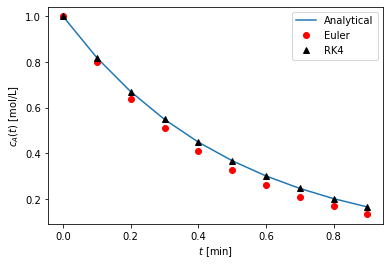

The RK4 method is closer to the analytical solution than the Euler method.


In [2]:
# Part 1 (1.5 points)

# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

# f(c, t) = dc/dt = -kc
# Note: argument t is not needed in the function.
f = lambda c: -k*c

# Define variables
c0 = 1   # mol/l
k = 2.0  # 1/min
h = 0.1  # min
t_points = np.arange(0, 1, h)

def analytical(h):
    # The analytical solution can be found by separation of variables and integrating over t = 0..t and cA(t) = c(0)..c(t)
    # The solution is then c(t) = c(0) exp(-kt)
    t_points = np.arange(0, 1, h)
    return c0 * np.exp(-k*t_points)
c_analytical = analytical(h)

def euler(h):
    # Euler's method: cA_n+1 = cA_n + h*f(t_n, cA_n), where f(t_n, cA_n) = dcA/dt = -k cA_n
    # So: cA_n+1 = cA_n - h*k*cA_n
    t_points = np.arange(0, 1, h)
    c_euler = []
    c = c0
    for t in t_points:
        c_euler.append(c)
        c += h*f(c)
    return c_euler
c_euler = euler(h)

def rk4(h):
    # RK4: y_n+1 = y_n + h/6 (k1 + 2*k2 + 2*k3 + k4),
    # where
    # k1 = f(y_n, t_n)
    # k2 = f(y_n + h/2 k1, t_n + h/2)
    # k3 = f(y_n + h/2 k2, t_n + h/2)
    # k4 = f(y_n + h k3, t_n + h)
    t_points = np.arange(0, 1, h)
    c_rk4 = []
    c = c0
    for t in t_points:
        c_rk4.append(c)
        k1 = f(c)
        k2 = f(c + 0.5*h*k1)
        k3 = f(c + 0.5*h*k2)
        k4 = f(c + h*k3)
        c += 1/6*h*(k1 + 2*k2 + 2*k3 + k4)
    return c_rk4
c_rk4 = rk4(h)

# Plot
plt.plot(t_points, c_analytical, label='Analytical')
plt.plot(t_points, c_euler, 'ro', label='Euler')
plt.plot(t_points, c_rk4, 'k^', label='RK4')
plt.xlabel('$t$ [min]')
plt.ylabel('$c_A(t)$ [mol/L]')
plt.legend()
plt.show()

# ANSWER
print("The RK4 method is closer to the analytical solution than the Euler method.")
#raise NotImplementedError()

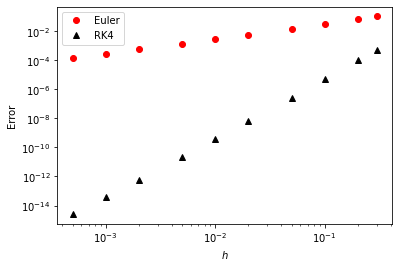

The RK4 method error decreases a lot faster than the Eeuler method error, as the h decreases.


In [3]:
# part 2 (1.5 points)
# YOUR CODE HERE
h_points = [0.3, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]
errors = {'Euler': [], 'RK4': []}
ind = -1  # The last data point is at t = 1 min - h

# Calculate the errors
for h in h_points:
    c_analytical = analytical(h)
    c_euler = euler(h)
    c_rk4 = rk4(h)
    errors['Euler'].append(abs(c_analytical[ind] - c_euler[ind]))
    errors['RK4'].append(abs(c_analytical[ind] - c_rk4[ind]))

# Plot
plt.loglog(h_points, errors['Euler'], 'ro', label='Euler')
plt.loglog(h_points, errors['RK4'], 'k^', label='RK4')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.legend()
plt.show()

print("The RK4 method error decreases a lot faster than the Eeuler method error, as the h decreases.")
#raise NotImplementedError()

In [4]:
# part 3 (1 point)
# YOUR CODE HERE
# Take logs of h and both errors
log_h = np.log(h_points)
log_error_euler = np.log(errors['Euler'])
log_error_rk4 = np.log(errors['RK4'])

# Perform a linear fit on the log data (polyfit returns [slope, intercept])
n_euler = np.polyfit(log_h, log_error_euler, 1)[0]
n_rk4 = np.polyfit(log_h, log_error_rk4, 1)[0]
print(f"Euler method error decreases with order n = {n_euler:.3f}")
print(f"RK4 method error decreases with order n = {n_rk4:.3f}")
print("The scaling factors correspond to the expected errors orders of O(h^2) and O(h^5) for the Euler and RK4 method, respectively.")
#raise NotImplementedError()

Euler method error decreases with order n = 1.040
RK4 method error decreases with order n = 4.075
The scaling factors correspond to the expected errors orders of O(h^2) and O(h^5) for the Euler and RK4 method, respectively.


## Exercise 5.2: The Lotka-Volterra equations (3 points)

The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called "rabbits" (the
prey) and "foxes'' (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and $y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:

$$
{\mathrm{d} x(t)\over\mathrm{d} t} = \alpha x(t) - \beta x(t)y(t),
$$

where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits - because they need food to grow and reproduce - but also die of
old age at a rate proportional to their own population:

$$
{\mathrm{d} y(t)\over\mathrm{d} t} = \gamma x(t)y(t) - \delta y(t),
$$

where $\gamma$ and $\delta$ are also constants.


1. Write a program to solve these equations using the fourth-order
  Runge-Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and
  $\delta=2$, starting from the initial condition $x=y=2$.  Make a graph showing both $x$ and $y$ as a function of time on
  the same axes from $t=0$ to $t=20$.  
2. Describe in words what is going on in the system, in terms of rabbits
  and foxes.



In [5]:
# Part 1 implementation (1 point)

# YOUR CODE HERE
# Functions dx/dt and dy/dt together in dr/dt
# Note: argument t is not needed
def f(r):
    x = r[0]
    y = r[1]
    fx = alpha * x - beta * x * y
    fy = gamma * x * y - delta * y
    return np.array([fx, fy], float)

# Define variables
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2
x0 = 2
y0 = 2

h = 0.01  # Some value for h
t_points = np.arange(0, 20, h)
# Use separate arrays for x and y
x_rk4 = []
y_rk4 = []
r = np.array([x0, y0], float)
for t in t_points:
    x_rk4.append(r[0])
    y_rk4.append(r[1])
    k1 = f(r)
    k2 = f(r + 0.5*h*k1)
    k3 = f(r + 0.5*h*k2)
    k4 = f(r + h*k3)
    r += 1/6*h*(k1 + 2*k2 + 2*k3 + k4)
#raise NotImplementedError()

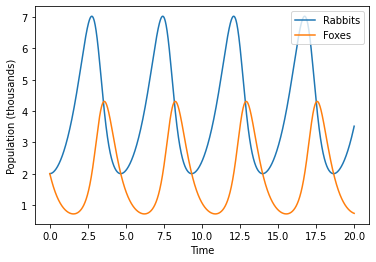

In [6]:
# Part 1 plot (0.5 points)
# YOUR CODE HERE
plt.plot(t_points, x_rk4, label='Rabbits')
plt.plot(t_points, y_rk4, label='Foxes')
plt.xlabel('Time')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()
#raise NotImplementedError()

Part 2 answer (0.5 points)

When the population of foxes is decreasing below 2000, the rabbit population goes up rapidly.
However, the fox population also starts to grow quickly when the rabbit population reaches approximately 3000.
The rabbit population peaks at ca. 7000 and starts to drop.
The fox population still grows, while the rabbit population is dropping, and peaks at ca. 4000, after which it also starts to drop.
Both populations go down until the rabbit population starts to grow again at ca 2000.
The fox population still drops while the number of rabbits is increasing, until it reaches a bottom at <1000, and then starts to rise again.
The same cycle is repeated prediodically.

## Exercise 5.3: Leapfrog method (2 points)

We want to solve the following second-order differential equation:
 
$$
{\mathrm{d}^2 x(t)\over\mathrm{d} t^2} - \biggl( {\mathrm{d} x(t)\over\mathrm{d} t} \biggr)^2 + x(t) + 5 = 0 .
$$

1. Change the second-order equation into two first-order equations and write them down.
2. Write the program that solves these equations using the Leapfrog method. Solve from $t=0$ to $t=50$ in steps of
$h=0.001$ with initial condition $x=1$ and $\mathrm{d} x/\mathrm{d} t = 0$.  Make a plot
of your solution showing $x$ as a function of $t$. 

Part 1 (0.5 points)

$$\frac{\text{d}x}{\text{d}t} = y, \quad \text{ and } \quad \frac{\text{d}y}{\text{d}t} = y^2 - x - 5$$

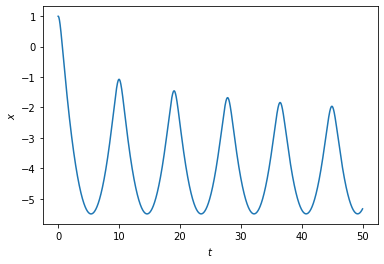

In [7]:
# Part 2 (1.5 points)

# YOUR CODE HERE
# Functions dy/dt, no t needed
fy = lambda x,y: y*y - x - 5
# fx is just y, so it is not explicitly defined

# Define variables
x0 = 1
y0 = 0
h = 0.001
t_points = np.arange(0, 50, h)
x_points = []
y_points = []

x = x0
y = y0 + 0.5*h*fy(x, y0)  # Calculate the first half-step
for t in t_points:
    x_points.append(x)
    y_points.append(y)
    x += h*y         # Calculate the next whole step
    y += h*fy(x, y)  # Calculate the next half-step

plt.plot(t_points, x_points)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()
#raise NotImplementedError()

## Exercise 5.4: Orbit of the Earth (5 points)

 Use the Verlet method to calculate the orbit of the Earth around
the Sun. The differential equation obeyed by the earth is straightforward to
derive.  The force between the Sun, with mass $M$ at the origin, and a
earth of mass $m$ with position vector $\mathbf{r}$ is $GMm/r^2$ in direction
$-\mathbf{r}/r$ (i.e., the direction towards the Sun), and hence Newton's
second law tells us that

$$
m {\mathrm{d}^2\mathbf{r}\over\mathrm{d} t^2} = -\biggl({GMm\over r^2}\biggr)\,{\mathbf{r}\over r}.
$$

Canceling the $m$ and taking the $x$ component we have

$$
{\mathrm{d}^2 x\over\mathrm{d} t^2} = -GM {x\over r^3}\,,
$$

and similarly for the other two coordinates.  We can, however, throw out
one of the coordinates because the earth stays in a single plane as it
orbits.  If we orient our axes so that this plane is perpendicular to
the $z$-axis, we can forget about the $z$ coordinate and we are left with
just two second-order equations to solve:

$$
{\mathrm{d}^2 x\over\mathrm{d} t^2} = -GM {x\over r^3}\,, \qquad
{\mathrm{d}^2 y\over\mathrm{d} t^2} = -GM {y\over r^3}\,,
$$

where $r=\sqrt{x^2+y^2}$ and $G=6.6738\times10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ is Newton's
gravitational constant and $M=1.9891\times10^{30}\,$kg is the mass of the
Sun.

The orbit of the Earth is not perfectly circular, the planet being
sometimes closer to and sometimes further from the Sun.  When it is at its
closest point, or ``perihelion", it is moving precisely tangentially
(i.e., perpendicular to the line between itself and the Sun) and it has
distance $1.4710\times10^{11}\,$m from the Sun and linear velocity
$3.0287\times10^4\,\mathrm{m\,s^{-1}}$. 

1. Turn these two second-order equations into four first-order equations and write them down.
2. Write a program to calculate the orbit of the Earth using the Verlet
  method with a time-step of $h=1$ hour. Choose the perihelion as starting point, which translates to
  the initial conditions $x=1.4710\times10^{11}\,$m and $y=0$ for the coordinates and $v_x=0$ and $v_y=3.0287\times10^4\,\mathrm{m\,s^{-1}}$ for the velocities.
  Make a
  plot of the orbit, showing 10 complete revolutions around the Sun.
  The orbit should be very slightly, but visibly, non-circular.
3.The gravitational potential energy of the Earth is $-GMm/r$, where
  $m=5.9722\times10^{24}\,$kg is the mass of the planet, and its kinetic
  energy is $1/2 mv^2$ as usual.  Modify your program to calculate both
  of these quantities at each step, along with their sum (which is the
  total energy), and make a plot showing all three as a function of time on
  the same axes.  You should find that the potential and kinetic energies
  vary visibly during the course of an orbit, but the total energy remains
  constant.
4. Now plot the total energy alone without the others and you should be
  able to see a slight variation over the course of an orbit.  Because
  you're using the Verlet method, however, which conserves energy in the
  long term, the energy should always return to its starting value at the
  end of each complete orbit.
5. Calculate the earth orbit with the second-order Runge-Kutta method instead of the Verlet algorithm . Plot the total energy and compare to the total energy from the Verlet algorithm. What is the major difference? Which method, second-order Runge-Kutta or Verlet, do you find more suitable for the investigated problem?


Part 1 (0.5 points):

$$\frac{\text{d}x}{\text{d}t} = v_x, \quad \frac{\text{d}v_x}{\text{d}t} = -GM \frac{x}{r^3}$$

$$\frac{\text{d}y}{\text{d}t} = v_y, \quad \frac{\text{d}v_y}{\text{d}t} = -GM \frac{y}{r^3}$$

In [65]:
# Parts 2-3. Verlet method with potential and kinetic energies (1.5 point)


# YOUR CODE HERE
"""
The Verlet algorithm:
    Before iteration,
      calculate v at the first midpoint:     v(t + 0.5h) = v(t) + 0.5h f(r(t), t)
    Then iterate by
      calculating r at the full point:       r(t + h) = r(t) + h v(t + 0.5h)
      calculating:                           k = h f(r(t + h), t + h)
      calculating v at the full point:       v(t + h) = v(t + 0.5h) + 0.5k
      calculating v at the next midpoint:    v(t + 1.5h) = v(t + 0.5h) + k
"""

import numpy as np
from matplotlib import pyplot as plt

def f(x, y, r):
    """ Return the functions f(x) = -GM x/r^3 and f(y) = -GM y/r^3 """
    fx = -G*M*x/r**3
    fy = -G*M*y/r**3
    return np.array([fx, fy], float)

def V(r):
    """ Return the Earth's potential energy """
    return -G*M*m/r

def T(vx, vy):
    """ Return the Earth's kinetic energy """
    return 0.5*m*(vx*vx + vy*vy)

# Define variables
# Units converted so that the orders of magnitude are closer together (in range 1e0 -- 1e-9)
#G = 6.6738e-11     # m^3 kg^-1 s^-2
#G = 8.6492448e-4   # m^3 kg^-1 h^-2
G = 8.6492448e-7   # (1e12 m)^3 (1e33 kg)^-1 h^-2
#M = 1.9891e30      # kg
M = 1.9891e-3      # 1e33 kg
#m = 5.9722e24      # kg
m = 5.9722e-9      # 1e33 kg
h = 1              # h
#x0 = 1.4710e11     # m
x0 = 1.4710e-1     # 1e12 m
y0 = 0             # 1e12 m
vx0 = 0            # 1e12 m h^-1
#vy0 = 3.0287e4     # m s^-1
#vy0 = 1.090332e8   # m h^-1
vy0 = 1.090332e-4  # 1e12 m h^-1

t_points = np.arange(0, 87601, h)  # 10 a * 365 d * 24 h + 1 hours for 10 full revolutions
x_points = []
y_points = []
vx_points = []
vy_points = []

# Potential and kinetic energies of Earth (for part 3)
Epot_points = []
Ekin_points = []
Etot_points = []

# Initial conditions
x = x0
y = y0
vx = vx0
vy = vy0
r = np.sqrt(x*x + y*y)

# Calculate v(t + 0.5h)
a = f(x, y, r)
vx += 0.5*a[0]
vy += 0.5*a[1]

for t in t_points:
    # Record positions at full point
    x_points.append(x)
    y_points.append(y)
    # Calculate the position at midpoint
    x += 0.5*h*vx
    y += 0.5*h*vy
    r = np.sqrt(x*x + y*y)
    # Calculate k
    k = h*f(x, y, r)
    # Record v at full point
    vx_points.append(vx + 0.5*k[0])
    vy_points.append(vx + 0.5*k[1])
    # Calculate v at the next midpoint
    vx += k[0]
    vy += k[1]
    
    # Calculate the potential, kinetic and total energies of Earth
    Epot = V(r)
    Ekin = T(vx, vy)
    Epot_points.append(Epot)
    Ekin_points.append(Ekin)
    Etot_points.append(Epot + Ekin)

print("Done!")
#raise NotImplementedError()

Done!


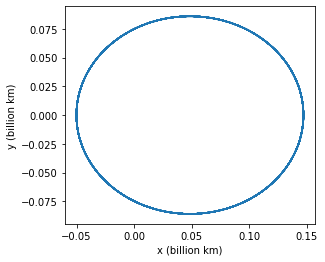

In [69]:
# Part 2 plot. (0.5 points)


# YOUR CODE HERE
plt.plot(x_points, y_points)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (billion km)')
plt.ylabel('y (billion km)')
plt.show()
#raise NotImplementedError()

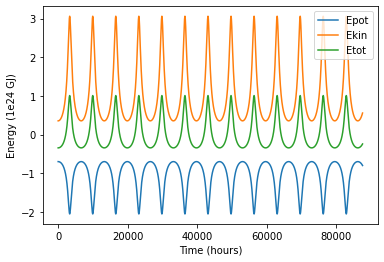

In [76]:
# Part 3 plot. (0.5 points)


# YOUR CODE HERE
# Scale units
Epot = np.array(Epot_points) * 1e16
Ekin = np.array(Ekin_points) * 1e16
Etot = np.array(Etot_points) * 1e16

plt.plot(t_points, Epot, label='Epot')
plt.plot(t_points, Ekin, label='Ekin')
plt.plot(t_points, Etot, label='Etot')
plt.xlabel('Time (hours)')
plt.ylabel('Energy (1e24 GJ)')
plt.legend()
plt.show()
#raise NotImplementedError()

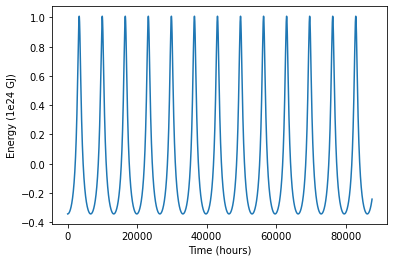

In [78]:
# Part 4. (0.5 points)


# YOUR CODE HERE
plt.plot(t_points, Etot)
plt.xlabel('Time (hours)')
plt.ylabel('Energy (1e24 GJ)')
plt.show()
#raise NotImplementedError()

Done!


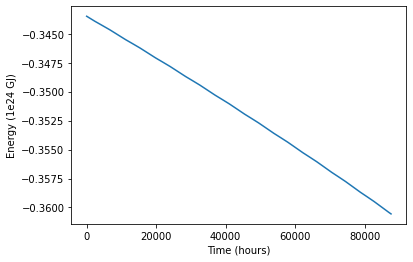

RK2 produces cumulative error, whereas the error in Verlet only fluctuates, and is conserved in the long run.
Thus, the Verlet algorithm is a more suitable method for this kind of problem.


In [82]:
# Part 5. (1.5 points)

# YOUR CODE HERE
"""
RK2 for position and velocity:
  k1 = h f(r, t)
  l1 = h v
  k2 = h f(r + 0.5 l1, v + 0.5 k1, t + 0.5 h)
  l2 = h (v + 0.5 k1)
  v(t + h) = v(t) + k2
  r(t + h) = r(t) + l2

Here f(...) = f(x, y, r), r being the radial distance, is the same as in Verlet,
and does not depend on v or t.
"""

# Initialize empty lists
x_points = []
y_points = []
Epot_points = []
Ekin_points = []
Etot_points = []

# Initial conditions
x = x0
y = y0
vx = vx0
vy = vy0
r = np.sqrt(x*x + y*y)

for t in t_points:
    # Record positions at full point
    x_points.append(x)
    y_points.append(y)
    # Calculate k1 and l1
    k1 = h * f(x, y, r)
    l1 = h * np.array([vx, vy], float)
    # Update r and calculate k2 and l2
    r = np.sqrt(x*x + y*y)
    k2 = h * f(x + 0.5*l1[0], y + 0.5*l1[1], r)
    l2 = h * np.array([vx + k1[0], vy + k1[1]])
    # Update velocities
    vx += k2[0]
    vy += k2[1]
    # Update positions
    x += l2[0]
    y += l2[1]
    r = np.sqrt(x*x + y*y)
    
    # Calculate the potential, kinetic and total energies of Earth
    Epot = V(r)
    Ekin = T(vx, vy)
    Epot_points.append(Epot)
    Ekin_points.append(Ekin)
    Etot_points.append(Epot + Ekin)

print("Done!")

Etot = np.array(Etot_points) * 1e16
plt.plot(t_points, Etot)
plt.xlabel('Time (hours)')
plt.ylabel('Energy (1e24 GJ)')
plt.show()

print("RK2 produces cumulative error, whereas the error in Verlet only fluctuates, and is conserved in the long run.")
print("Thus, the Verlet algorithm is a more suitable method for this kind of problem.")
#raise NotImplementedError()

## Exercise 5.5: Solution of the Poisson equation (2 Points)

As a more complex example of the use of the relaxation method, let us consider the solution of the Poisson equation of electrostatics

$$
\nabla^2\phi = - \frac{\rho}{\epsilon_0}
$$

 which governs the electric potential in the presence of a charge density $\rho$. Here $\epsilon_0$ is the permittivity of empty space (and we are assuming that we are in empty space). Let us consider this equation in two dimensions, for simplicity, in a square box 1 m along each side. All the walls of the box will be at voltage zero, but there will be two square charge in the box, one positive, one negative, as depicted below.
 
<img src="poisson.png" width="400" />

The two charges are each 20 cm on a side and 20 cm from the walls of the box and have the charge density $\rho = \pm 1 ~\mathrm{Cm}^{-2}$.

To solve this problem using the relaxation method we proceed similar as in the example in the lecture and rewrite the Poisson equation as

$$
\frac{\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) -4\phi(x,y)}{a^2} = - \frac{\rho(x,y)}{\epsilon_0}
$$

Now we rearrange this expression for $\phi(x,y)$ and get

$$
\phi(x,y) = \frac{1}{4}\left[\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) \right] + \frac{a^2}{4\epsilon_0}\rho(x,y)
$$

This is similar to the example for the Laplace equation discussed in the lecture, but with the addition of the term $\rho(x,y)$. Note that the spacing $a$ of the grid points no longer drops out of the calculation. We can, however, still solve the problem as we did before by choosing initial values for $\phi(x,y)$ on a grid and then iterating to convergence.

Write a program to solve Poisson's equaion for this system. Work in units where $\epsilon_0 = 1$ and continue the iteration until your solution for the electric potential changes by less than $10^{-6}~\mathrm{V}$ per step at every grid point.

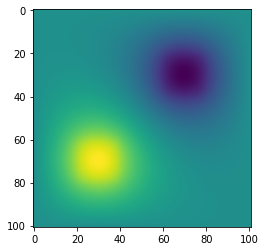

In [86]:
# YOUR CODE HERE
M = 100
V = 1

phi = np.zeros([M+1, M+1], float)
phi[0,:] = V
phiprime = np.empty([M+1, M+1], float)

target = 1e-6
delta = 1
while delta > target:
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                if (i >= 60 and i < 80) and (j >= 20 and j < 40):  # i,j at the positive charge
                    phiprime[i,j] += 1/4  # add the term a^2 / 4 eps0 rho_+
                elif (i >= 20 and i < 40) and (j >= 60 and j < 80):  #i,j at the negative charge
                    phiprime[i,j] -= 1/4  # add the term a^2 / 4 eps0 rho_-
    
    delta = np.max(abs(phi-phiprime))
    phi,phiprime = phiprime,phi

plt.imshow(phi)
plt.show()
#raise NotImplementedError()

Please comment on your results:

The positive and negative charges can be seen in the plot. The charges "bleed" onto the surroundings.

## Exercise 5.6: FTCS solution of the wave equation (4 points)

Consider a piano string of
length $L$, initially at rest.  At time $t=0$ the string is struck by the
piano hammer a distance $d$ from the end of the string:

<img src="piano.png" width="500" />

The string vibrates as a result of being struck, except at
the ends, $x=0$ and $x=L$, where it is held fixed.

This system can be described by the 1D wave equation

$$
\frac{\partial^2\phi}{\partial t^2} = v^2\frac{\partial^2\phi}{\partial x^2}
$$

We start by dividing the string into discrete points with spacing $a$. Then we replace the
right-hand side of the equation with a discrete difference, see lecture, and derive a set of
second-order differential equation, one for each grid point

$$
\frac{\partial^2\phi}{\partial t^2} = \frac{v^2}{a^2}\left[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right]
$$

Now we change this second-order equation into two first-order equations:

$$
\frac{\mathrm{d}\phi}{\mathrm{d}t} = \psi(x,t), \qquad \qquad \frac{\mathrm{d}\psi}{\mathrm{d}t} = \frac{v^2}{a^2}\left[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right]
$$

Then, applying Euler's method, these equations become two FTCS equations

$$
\phi(x,t+h) = \phi(x,t) + h\psi(x,t), \qquad \qquad \psi(x,t+h) = \psi(x,t) +h \frac{v^2}{a^2}\left[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)\right]
$$


1. Write a program that uses the FTCS method to solve the complete set
  of simultaneous first-order equations arrived above for the case
  $v=100\,\mathrm{ms}^{-1}$, with the initial condition that $\phi(x)=0$
  everywhere but the velocity $\psi(x)$ is nonzero, with profile 
$$
\psi(x) = C {x(L-x)\over L^2} \exp \biggl[ -{(x-d)^2\over2\sigma^2} \biggr],
$$
where $L=1\mathrm{m}$, $d=10\mathrm{cm}$, $C=1\,\mathrm{ms}^{-1}$, and $\sigma=0.3\mathrm{m}$.
You will also need to choose a value for the time-step $h$. A reasonable
choice is $h=10^{-6}\mathrm{s}$.

2. Plot the solution at  2 ms, 83 ms and 100 ms. Make also an animation of the motion of the piano string. There are various ways how
you can could do animations, which were introduce in the first lecture of this course. You can use `FuncAnimation ` from the `matplotlib` package. You 
can also use the `vpython` package by, e.g., placing a small sphere at the location of each grid point on the string.   Allow your animation to run for at least 100 ms.
3. When do numerical instabilities start to appear? The FTCS method worked well for the diffusion problem discussed in the lecture. Can you improve the numerical stability for the wave equation by making the step size smaller?

In [87]:
# Part 1 solution. (1.5 points)


# YOUR CODE HERE
#import numpy as np
#from matplotlib import pyplot as plt
#
## Define variables
#L = 1        # m
#d = 0.01     # m
#C = 1e-3     # s^-1
#sigma = 0.3  # m
#h = 10e-6    # s
#N = 100      # number of grid points
#a = L/N      # grid spacing
#
#psi = np.empty([N+1], float)
#
#def f(tend):
#    x = 0
#    t = 0
#    while t < tend:
#        for i in range(1, N):
#            psi[i] = C * x*(L - x) / (L*L) * np.exp(-(x-d)*(x-d) / (2*sigma*sigma))

# NOTE: Time ran out!
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# Part 2 plots of solution. (0.5 points)


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Part 2 animation. (1 point)


# YOUR CODE HERE
raise NotImplementedError()

Part 3 answer. (1 point)
